**Because I don't have an Nvidia GPU, I'm going to use Colab to train the model using Tensorflow-GPU and Keras.**

After training the model I'm going to save the model locally and test it using the webcam.

## Face Recognition System using Tensorflow and Keras

**Step 1: Upload data to Colab**

Upload the data folder containing a training and testing folder.
Each folder will contain 2 or more classes. In my case, I have 2 classes: user and not_user.

**Step 2: Train the model**


In [2]:
%cd /content

/content


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [0]:
!unzip data.zip

In [0]:
train_data_dir = "saved/train"
validation_data_dir = "saved/test"
nb_train_samples = 100
nb_validation_samples = 20
img_width, img_height = 128, 128
epochs = 10
batch_size = 16
num_classes = 2 # username and not_username

In [0]:
if K.image_data_format() == "channels_first":
  input_shape = (1, img_width, img_height)
else:
  input_shape = (img_width, img_height, 1)

In [5]:
# From VGGNET Network

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu', padding='same',
          input_shape=input_shape))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history = model.compile(loss="categorical_crossentropy",
                       optimizer="adam",
                       metrics=["acc"])
history

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
__________

In [9]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# Rescale
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,color_mode='grayscale',
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,color_mode='grayscale',
    class_mode='categorical')

Found 40 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5)


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_train_samples//batch_size,
    callbacks=[early_stopping])

model.save('model_face.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6/6 [==============================] - 3s 529ms/step - loss: 0.6543 - acc: 0.5857 - val_loss: 0.2611 - val_acc: 0.8571
Epoch 2/10
6/6 [==============================] - 0s 43ms/step - loss: 0.2726 - acc: 0.9571 - val_loss: 0.2173 - val_acc: 0.8571
Epoch 3/10
6/6 [==============================] - 0s 45ms/step - loss: 0.4216 - acc: 0.8875 - val_loss: 0.1114 - val_acc: 0.9286
Epoch 4/10
6/6 [==============================] - 0s 44ms/step - loss: 0.3114 - acc: 0.8696 - val_loss: 0.1135 - val_acc: 0.9286
Epoch 5/10
6/6 [==============================] - 0s 44ms/step - loss: 0.1569 - acc: 0.9196 - val_loss: 0.1562 - val_acc: 0.9286
Epoch 6/10
6/6 [==============================] - 0s 45ms/step - loss: 0.2138 - acc: 0.8607 - val_loss: 0.1896 - val_acc: 0.9286
Epoch 7/10
6/6 [==============================] - 0s 55ms/step - loss: 0.2030 - acc: 0.8786 - val_loss: 0.1834 - val_acc: 1.0000
Epoch 8/10
6/6 [==============================] 

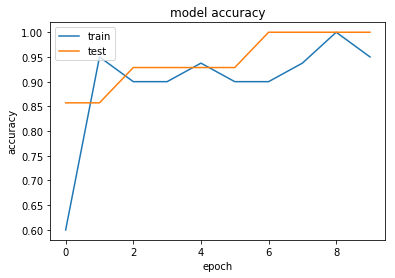

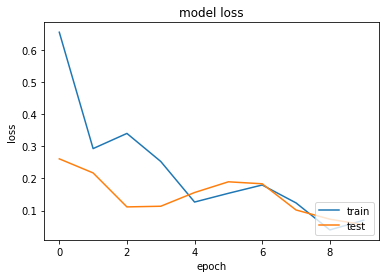

In [11]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()